<a href="https://colab.research.google.com/github/swetha-guggal/BharathInternship/blob/main/TITANIC_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Title: "Titanic Survival Prediction Project"

Overview:
The Titanic Survival Prediction Project is a data science and machine learning project that aims to predict the survival of passengers on the ill-fated RMS Titanic. This project utilizes historical data on Titanic passengers, including information such as age, gender, socio-economic status, and other features, to develop a predictive model. The primary goal is to build a model that can determine the likelihood of a passenger's survival in the event of a sinking.

Key Components of the Project:

Data Collection: The project starts with the collection of historical data from the Titanic dataset, which includes passenger information such as age, gender, class, and other attributes.

Data Preprocessing: Data preprocessing involves tasks like handling missing values, encoding categorical variables, and splitting the data into training and testing sets.

Model Selection: Various machine learning algorithms, such as logistic regression, random forests, and support vector machines, are explored to determine the best model for predicting survival.

Model Training: The selected model is trained on a portion of the data to learn patterns and relationships in the dataset.

Model Evaluation: The trained model is evaluated using a separate test dataset to assess its performance. Metrics such as accuracy, precision, recall, and F1-score are used to gauge the model's predictive capabilities.

Hyperparameter Tuning: The project may involve fine-tuning the model by adjusting hyperparameters to optimize its performance.

Visualization: Data visualizations are created to better understand the dataset and model results. These visualizations can include survival rate by gender, age distribution, confusion matrices, and feature importance plots.

Inference: Once the model is developed and evaluated, it can be used to make predictions on new data to determine whether a given individual would have survived the Titanic disaster.

The Titanic Survival Prediction Project serves as a compelling example of how data science and machine learning techniques can be applied to historical data to make predictions and gain insights into a significant event in history. The project demonstrates the use of classification algorithms to model and understand survival patterns on the Titanic, providing valuable insights into the factors that played a role in passengers' chances of survival


#uploading data

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Titanic dataset from Seaborn
titanic = sns.load_dataset('titanic')





In [27]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [28]:
#shape of the data
titanic.shape

(891, 15)

In [4]:
#columns of dataset
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [29]:
#information about dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [31]:
titanic.columns.nunique()

15

In [30]:
#basic information of dataset
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#EDA

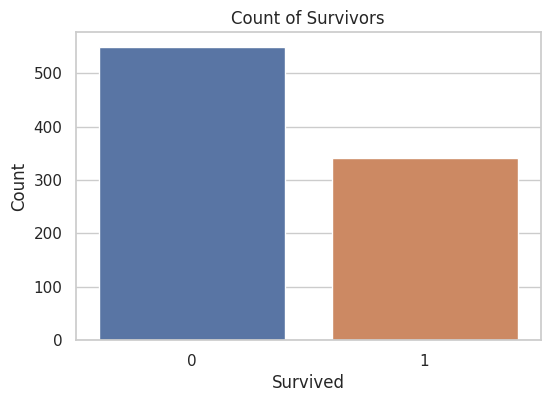

In [32]:
#Count Plot for Survival:
#creates a count plot to visualize the distribution of passengers who survived and those who did not.
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x="survived", data=titanic)
plt.title("Count of Survivors")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()


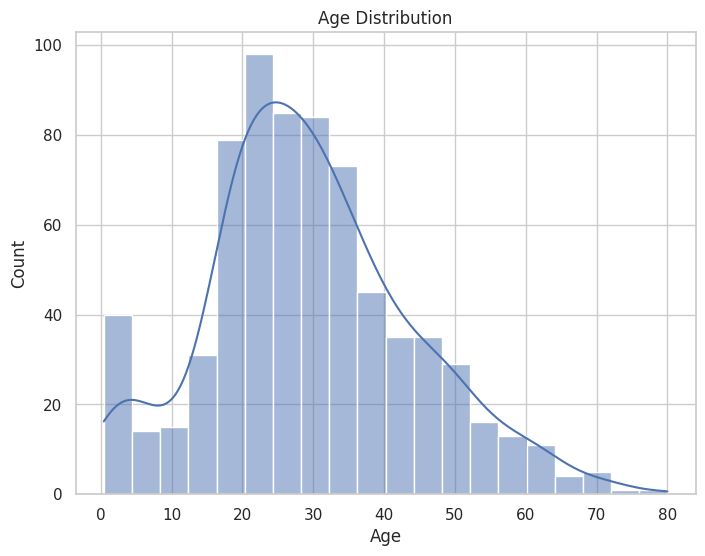

In [33]:
#Age Distribution: generates a histogram to visualize the distribution of passengers' ages.
plt.figure(figsize=(8, 6))
sns.histplot(data=titanic, x="age", bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()



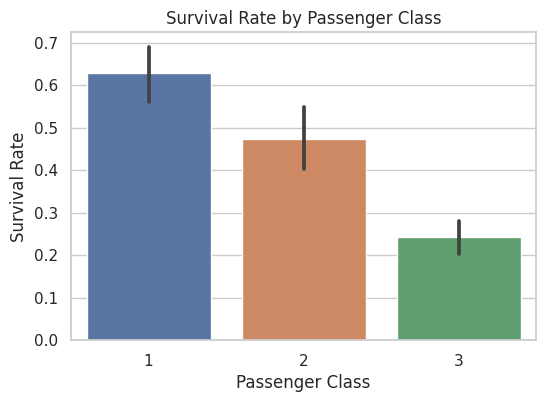

In [34]:
#Survival by Passenger Class:
#Create a bar chart to visualize the survival rate by passenger class.
plt.figure(figsize=(6, 4))
sns.barplot(x="pclass", y="survived", data=titanic)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()


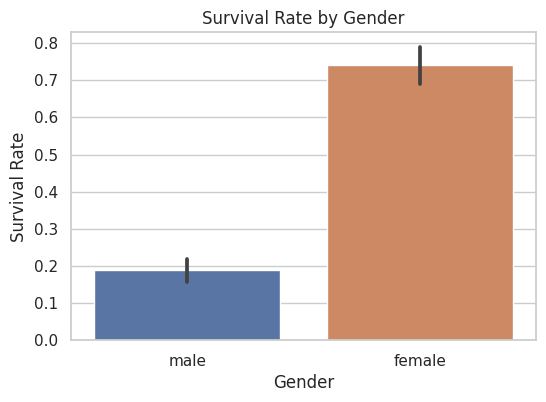

In [35]:
#Survival by Gender:
#Visualize the survival rate by gender using a bar chart.
plt.figure(figsize=(6, 4))
sns.barplot(x="sex", y="survived", data=titanic)
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.show()


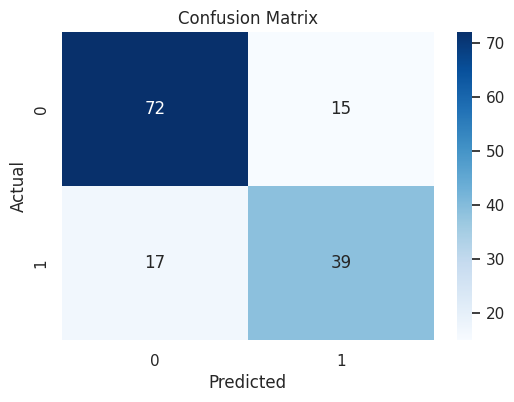

In [36]:
#Confusion Matrix Heatmap:
#Plot a heatmap of the confusion matrix to visualize the performance of your model.
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


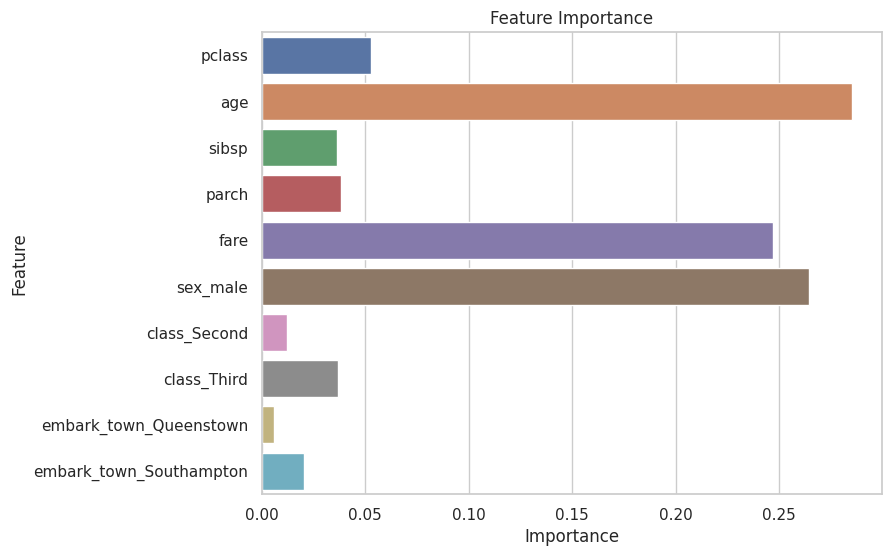

In [37]:
plt.figure(figsize=(8, 6))
sns.barplot(x=model.feature_importances_, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [38]:
#Data preprocessing and feature selection
titanic.drop(['deck', 'alive'], axis=1, inplace=True)
titanic.dropna(subset=['embark_town'], inplace=True)
titanic['age'].fillna(titanic['age'].mean(), inplace=True)

In [39]:
# Encode categorical variables
titanic = pd.get_dummies(titanic, columns=['sex', 'class', 'embark_town', 'alone'], drop_first=True)


In [40]:
# Feature selection
features = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'class_Second', 'class_Third', 'embark_town_Queenstown', 'embark_town_Southampton']
X = titanic[features]
y = titanic['survived']

In [41]:
print(titanic.columns)


Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'embarked',
       'who', 'adult_male', 'sex_male', 'class_Second', 'class_Third',
       'embark_town_Queenstown', 'embark_town_Southampton', 'alone_True'],
      dtype='object')


In [42]:
from sklearn.impute import SimpleImputer

# Create an imputer instance
imputer = SimpleImputer(strategy='mean')  # You can choose 'mean', 'median', 'most_frequent', etc.

# Fit the imputer on your data and transform it
X = imputer.fit_transform(X)


In [43]:
titanic.dropna(subset=['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'class_Second', 'class_Third', 'embark_town_Queenstown', 'embark_town_Southampton'], inplace=True)
X = titanic[features]
y = titanic['survived']


In [44]:
# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
# Create and train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [46]:
# Make predictions
y_pred = model.predict(X_test)


In [47]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7640449438202247


              precision    recall  f1-score   support

           0       0.83      0.77      0.80       109
           1       0.68      0.75      0.71        69

    accuracy                           0.76       178
   macro avg       0.75      0.76      0.76       178
weighted avg       0.77      0.76      0.77       178



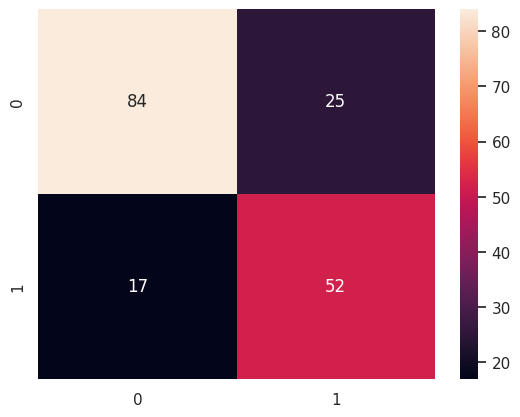

In [48]:
# Classification report and confusion matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [55]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic)

# Train and test Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Train and test Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8033707865168539
Random Forest Accuracy: 0.7808988764044944
SVM Accuracy: 0.6853932584269663


In [56]:
logistic_model = LogisticRegression(max_iter=1000)  # Increase max_iter to 1000


In [57]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use the scaled data to train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)


LogisticRegression()

In [58]:
logistic_model = LogisticRegression(solver='saga')  # Try a different solver


In [59]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



# Initialize a dictionary to store model accuracies
model_accuracies = {}

# Train and test Logistic Regression with increased max_iter
logistic_model = LogisticRegression(max_iter=1000)  # Increased max_iter
logistic_model.fit(X_train, y_train)
y_pred_logistic_test = logistic_model.predict(X_test)
accuracy_logistic_test = accuracy_score(y_test, y_pred_logistic_test)
model_accuracies["Logistic Regression"] = accuracy_logistic_test

# Train and test Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
y_pred_rf_test = random_forest_model.predict(X_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
model_accuracies["Random Forest"] = accuracy_rf_test

# Train and test Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm_test = svm_model.predict(X_test)
accuracy_svm_test = accuracy_score(y_test, y_pred_svm_test)
model_accuracies["SVM"] = accuracy_svm_test

# Print test accuracies for each model
for model, test_accuracy in model_accuracies.items():
    print(f"{model} - Test Accuracy: {test_accuracy:.2f}")

# Determine the best model based on test accuracy
best_model = max(model_accuracies, key=model_accuracies.get)
print(f"The best model is: {best_model} with a test accuracy of {model_accuracies[best_model]:.2f}")


Logistic Regression - Test Accuracy: 0.80
Random Forest - Test Accuracy: 0.77
SVM - Test Accuracy: 0.69
The best model is: Logistic Regression with a test accuracy of 0.80


Titanic Survival Prediction Project serves as an exemplar of how data science and machine learning techniques can be applied to historical data for making predictions and gaining insights into a significant historical event. This project demonstrates the use of classification algorithms to model and comprehend survival patterns on the Titanic, providing valuable insights into the factors that influenced passengers' chances of survival during this iconic maritime tragedy.
